In [2]:
import pandas as pd
from pycaret.regression import *
from IPython.core.display import HTML

In [3]:
df = pd.read_csv('ML_Data_SiCPowerMOSFET.csv')

In [4]:
df.head()

,TrapConc,Epi2Conc,WellLeft,nPlusShift,Kch,gm,RdsON_gm,Rch_gm,Rjfet_gm,Rdrift_gm,IdSat_max,IdSC800V_max,SCWT800V_us
0,20000000000000,2.800000e+16,3.35,0.4,1.00,0.06880,0.06880,0.05379,0.01439,0.01430,112.23952,130.308,7.236
1,20000000000000,2.800000e+16,3.35,0.4,0.90,0.07200,0.07200,0.05005,0.01411,0.01428,128.75760,147.916,6.330
2,20000000000000,2.800000e+16,3.35,0.4,0.95,0.07039,0.07039,0.05191,0.01425,0.01429,120.01159,138.646,6.766
3,20000000000000,2.800000e+16,3.35,0.4,0.70,0.07985,0.07985,0.04227,0.01353,0.01426,181.18092,199.937,4.751
4,20000000000000,2.800000e+16,3.35,0.4,0.80,0.07563,0.07563,0.04619,0.01386,0.01427,150.98489,170.780,5.550


In [5]:
params = ['TrapConc', 'Epi2Conc', 'WellLeft', 'nPlusShift', 'Kch']
output = ['gm', 'RdsON_gm', 'Rch_gm', 'Rjfet_gm', 'Rdrift_gm', 'IdSat_max', 'IdSC800V_max', 'SCWT800V_us']

Target feature: gm


,Description,Value
0,Session id,12233
1,Target,gm
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0034,0.0000,0.0054,0.9961,0.0043,0.0192,0.0070
et,Extra Trees Regressor,0.0030,0.0000,0.0050,0.9959,0.0040,0.0191,0.0190
rf,Random Forest Regressor,0.0041,0.0000,0.0060,0.9950,0.0048,0.0260,0.0230
dt,Decision Tree Regressor,0.0041,0.0001,0.0067,0.9940,0.0055,0.0268,0.0030
lightgbm,Light Gradient Boosting Machine,0.0074,0.0001,0.0106,0.9865,0.0085,0.0467,0.0370
ada,AdaBoost Regressor,0.0089,0.0002,0.0119,0.9833,0.0095,0.0546,0.0070
lar,Least Angle Regression,0.0124,0.0002,0.0147,0.9761,0.0126,0.1101,0.0030
knn,K Neighbors Regressor,0.0154,0.0005,0.0210,0.9494,0.0166,0.0850,0.0050
ridge,Ridge Regression,0.0161,0.0005,0.0223,0.9437,0.0176,0.0862,0.0030
llar,Lasso Least Angle Regression,0.0174,0.0006,0.0238,0.9360,0.0189,0.0962,0.0030


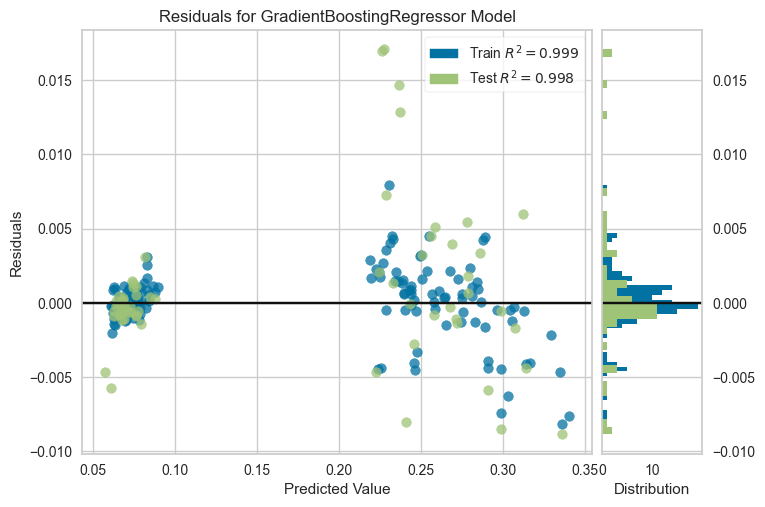

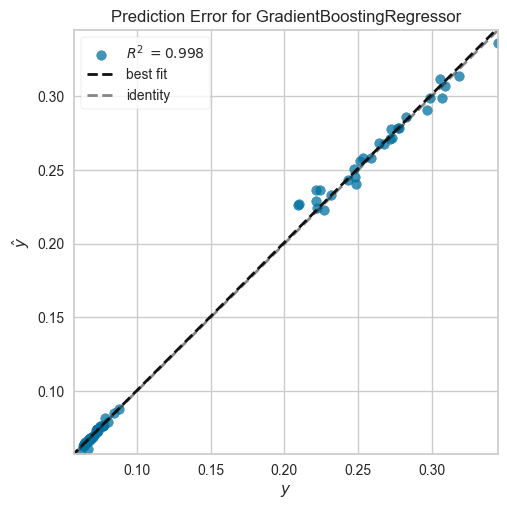

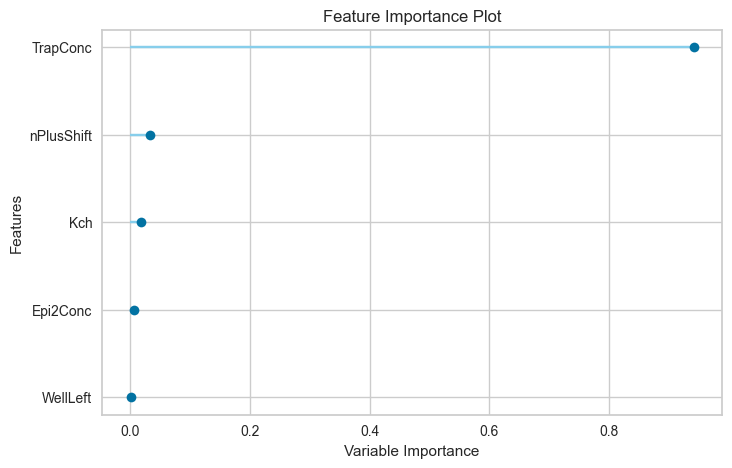

Model Successfully Saved
Target feature: RdsON_gm


,Description,Value
0,Session id,12233
1,Target,RdsON_gm
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0016,0.0000,0.0025,0.8101,0.0024,0.0239,0.0180
rf,Random Forest Regressor,0.0020,0.0000,0.0028,0.7771,0.0026,0.0292,0.0230
gbr,Gradient Boosting Regressor,0.0022,0.0000,0.0030,0.7158,0.0028,0.0317,0.0070
dt,Decision Tree Regressor,0.0024,0.0000,0.0033,0.6880,0.0031,0.0355,0.0030
ada,AdaBoost Regressor,0.0032,0.0000,0.0040,0.5977,0.0037,0.0480,0.0090
lightgbm,Light Gradient Boosting Machine,0.0032,0.0000,0.0039,0.5709,0.0037,0.0469,0.0360
knn,K Neighbors Regressor,0.0045,0.0000,0.0052,0.3501,0.0049,0.0662,0.0070
lar,Least Angle Regression,0.0055,0.0000,0.0064,0.0910,0.0060,0.0812,0.0030
ridge,Ridge Regression,0.0054,0.0000,0.0064,0.0808,0.0060,0.0794,0.0030
llar,Lasso Least Angle Regression,0.0054,0.0000,0.0064,0.0720,0.0060,0.0791,0.0030


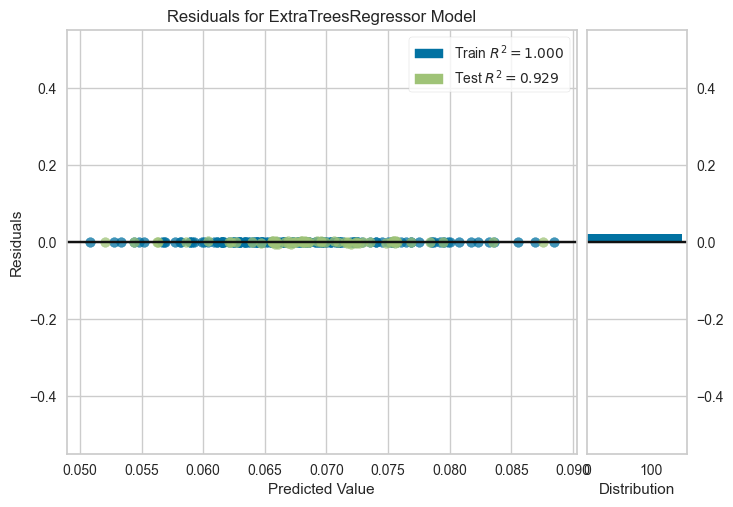

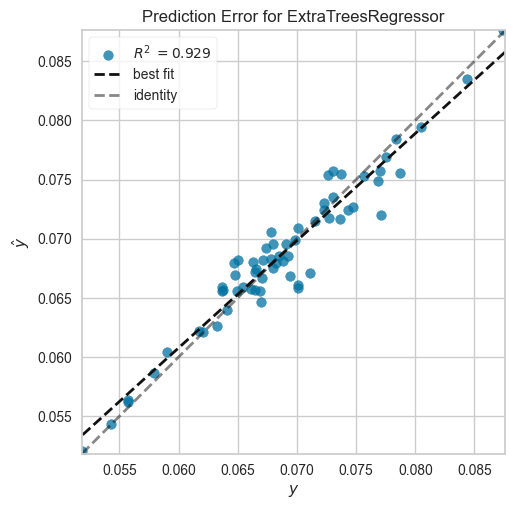

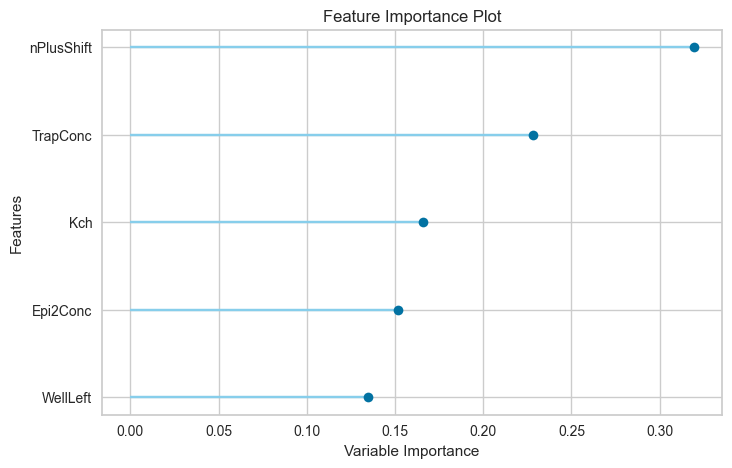

Model Successfully Saved
Target feature: Rch_gm


,Description,Value
0,Session id,12233
1,Target,Rch_gm
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0005,0.0000,0.0007,0.9954,0.0006,0.0111,0.0070
et,Extra Trees Regressor,0.0005,0.0000,0.0010,0.9886,0.0009,0.0126,0.0180
rf,Random Forest Regressor,0.0009,0.0000,0.0013,0.9849,0.0012,0.0217,0.0220
dt,Decision Tree Regressor,0.0006,0.0000,0.0012,0.9833,0.0012,0.0145,0.0030
lar,Least Angle Regression,0.0012,0.0000,0.0015,0.9805,0.0014,0.0347,0.0030
lightgbm,Light Gradient Boosting Machine,0.0018,0.0000,0.0024,0.9409,0.0023,0.0437,0.0330
ada,AdaBoost Regressor,0.0024,0.0000,0.0029,0.9259,0.0028,0.0630,0.0060
knn,K Neighbors Regressor,0.0046,0.0000,0.0054,0.7491,0.0052,0.1233,0.0050
ridge,Ridge Regression,0.0046,0.0000,0.0055,0.7397,0.0053,0.1236,0.0030
llar,Lasso Least Angle Regression,0.0053,0.0000,0.0062,0.6744,0.0060,0.1422,0.0030


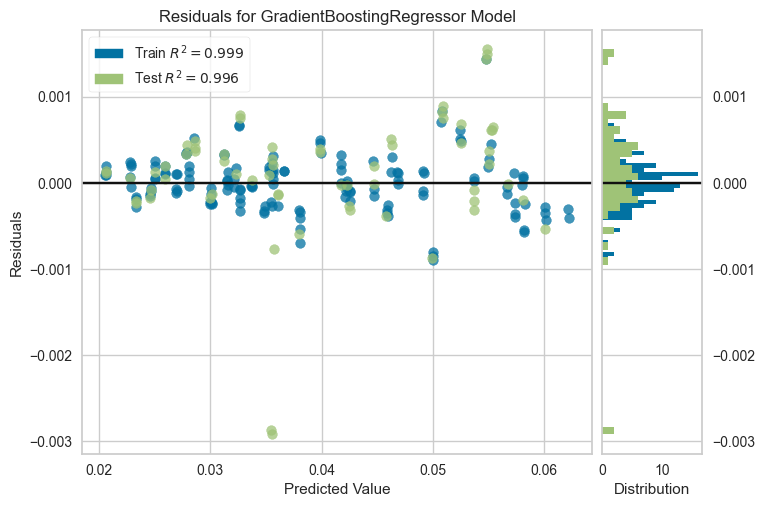

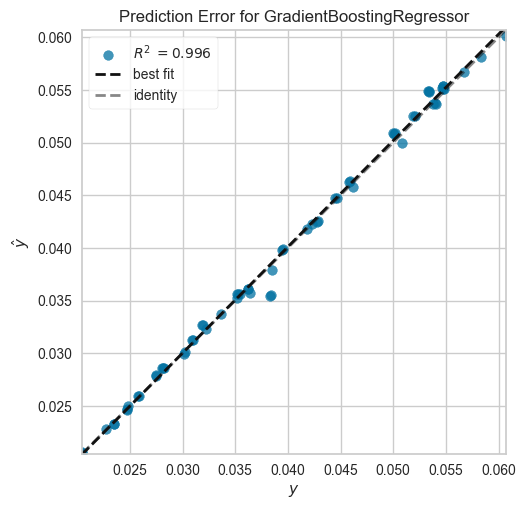

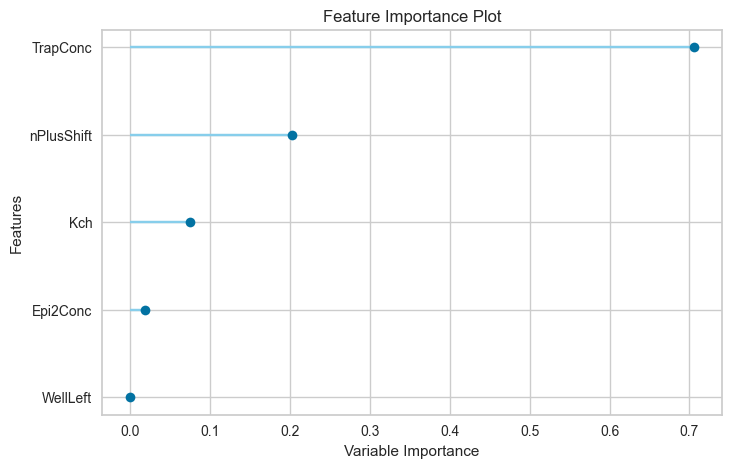

Model Successfully Saved
Target feature: Rjfet_gm


,Description,Value
0,Session id,12233
1,Target,Rjfet_gm
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0001,0.0000,0.0002,0.9962,0.0002,0.0079,0.0060
et,Extra Trees Regressor,0.0002,0.0000,0.0003,0.9927,0.0003,0.0095,0.0190
rf,Random Forest Regressor,0.0003,0.0000,0.0004,0.9880,0.0004,0.0138,0.0210
dt,Decision Tree Regressor,0.0003,0.0000,0.0004,0.9879,0.0004,0.0139,0.0030
ada,AdaBoost Regressor,0.0008,0.0000,0.0010,0.9136,0.0010,0.0490,0.0080
ridge,Ridge Regression,0.0009,0.0000,0.0016,0.8516,0.0015,0.0505,0.0030
knn,K Neighbors Regressor,0.0008,0.0000,0.0016,0.8462,0.0015,0.0342,0.0060
lar,Least Angle Regression,0.0012,0.0000,0.0016,0.8177,0.0016,0.0682,0.0030
lightgbm,Light Gradient Boosting Machine,0.0012,0.0000,0.0021,0.6943,0.0021,0.0650,0.0380
llar,Lasso Least Angle Regression,0.0020,0.0000,0.0029,0.4719,0.0028,0.1099,0.0030


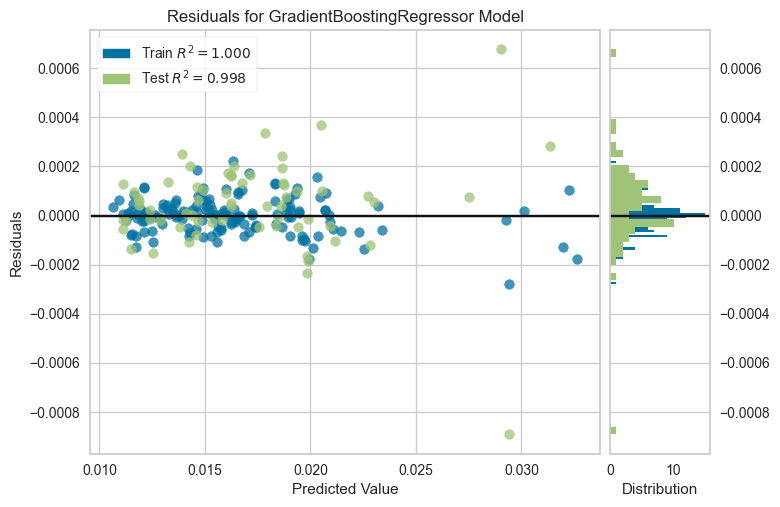

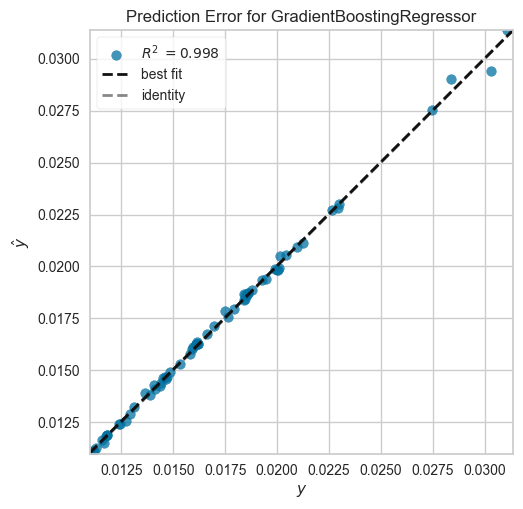

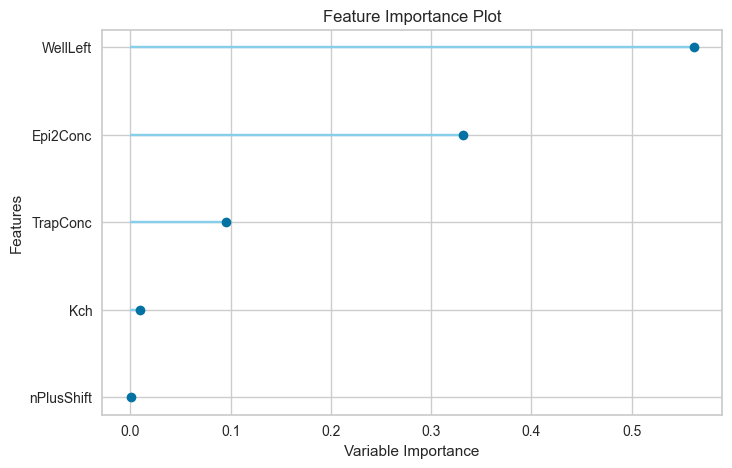

Model Successfully Saved
Target feature: Rdrift_gm


,Description,Value
0,Session id,12233
1,Target,Rdrift_gm
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0000,0.0000,0.0000,0.9999,0.0000,0.0004,0.0180
gbr,Gradient Boosting Regressor,0.0000,0.0000,0.0000,0.9999,0.0000,0.0004,0.0070
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,0.9998,0.0000,0.0004,0.0030
rf,Random Forest Regressor,0.0000,0.0000,0.0000,0.9984,0.0000,0.0009,0.0220
ada,AdaBoost Regressor,0.0001,0.0000,0.0002,0.9649,0.0002,0.0068,0.0040
lar,Least Angle Regression,0.0002,0.0000,0.0002,0.9520,0.0002,0.0101,0.0030
ridge,Ridge Regression,0.0002,0.0000,0.0003,0.9202,0.0003,0.0114,0.0030
knn,K Neighbors Regressor,0.0003,0.0000,0.0004,0.8417,0.0004,0.0156,0.0050
lightgbm,Light Gradient Boosting Machine,0.0003,0.0000,0.0006,0.6928,0.0006,0.0202,0.0380
omp,Orthogonal Matching Pursuit,0.0008,0.0000,0.0011,-0.1040,0.0011,0.0509,0.0030


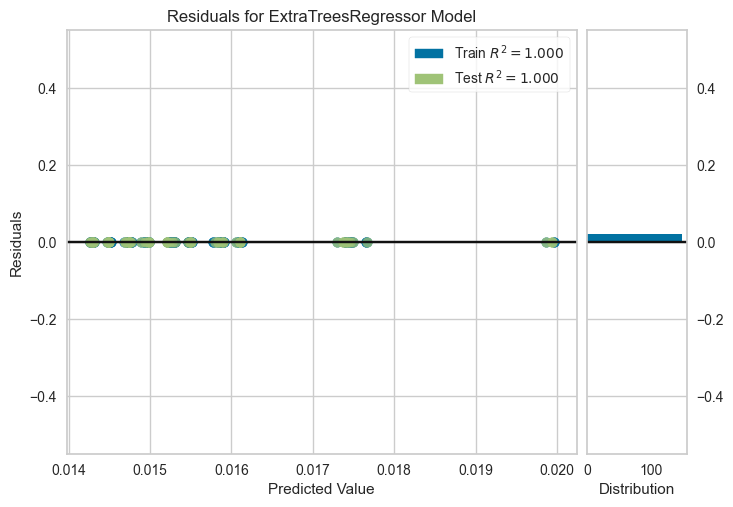

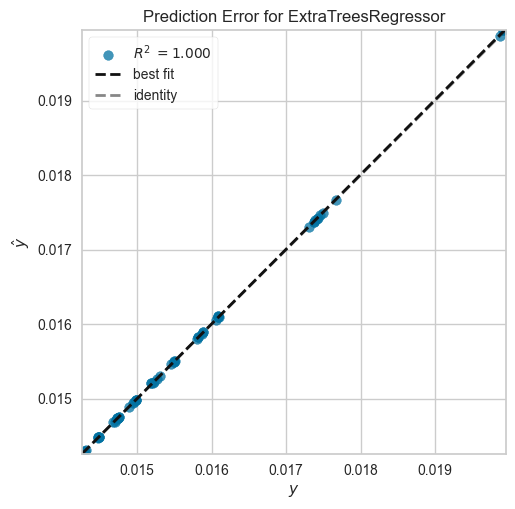

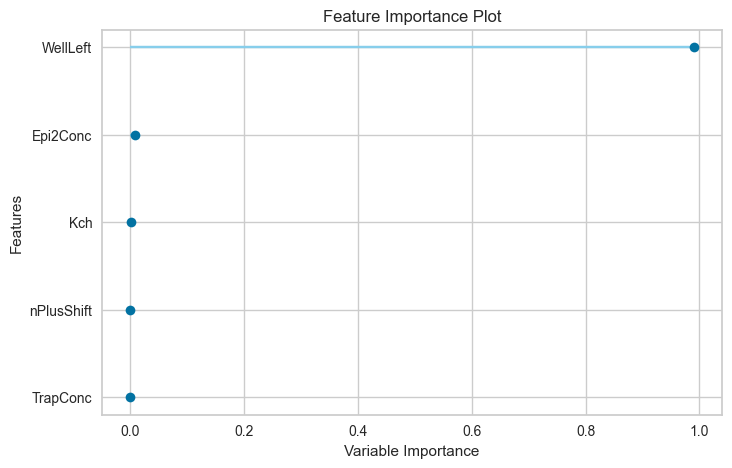

Model Successfully Saved
Target feature: IdSat_max


,Description,Value
0,Session id,12233
1,Target,IdSat_max
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,6.3657,92.8617,9.0337,0.9765,0.0433,0.0334,0.0050
et,Extra Trees Regressor,7.0367,131.4236,10.4173,0.9665,0.0557,0.0398,0.0180
lar,Least Angle Regression,10.8532,188.7078,13.6191,0.9516,0.0904,0.0657,0.0030
rf,Random Forest Regressor,10.6569,201.4430,13.4699,0.9485,0.0707,0.0596,0.0210
dt,Decision Tree Regressor,10.6985,238.6961,14.4606,0.9405,0.0750,0.0584,0.0030
lightgbm,Light Gradient Boosting Machine,13.7047,396.0397,18.1245,0.9023,0.0956,0.0793,0.0390
ada,AdaBoost Regressor,19.7984,607.7873,24.0975,0.8467,0.1298,0.1161,0.0070
knn,K Neighbors Regressor,32.1712,1497.9603,38.2655,0.6123,0.1969,0.1777,0.0050
ridge,Ridge Regression,32.3187,1592.1694,39.2827,0.6061,0.1989,0.1756,0.0030
lasso,Lasso Regression,34.0530,1783.2063,41.3129,0.5685,0.2113,0.1857,0.0030


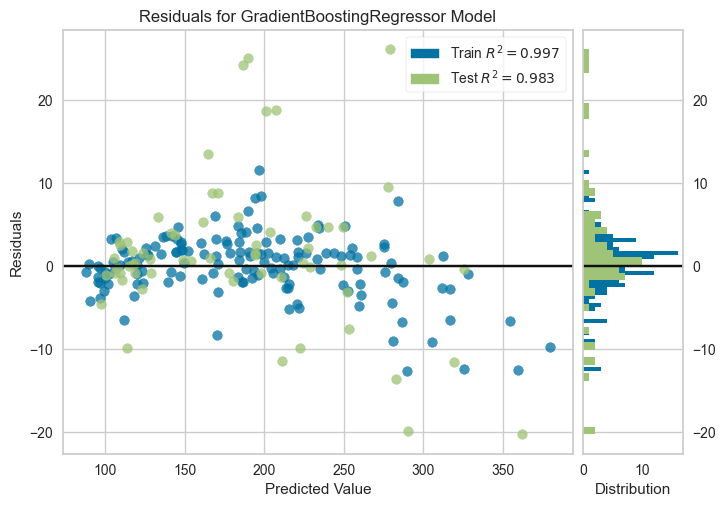

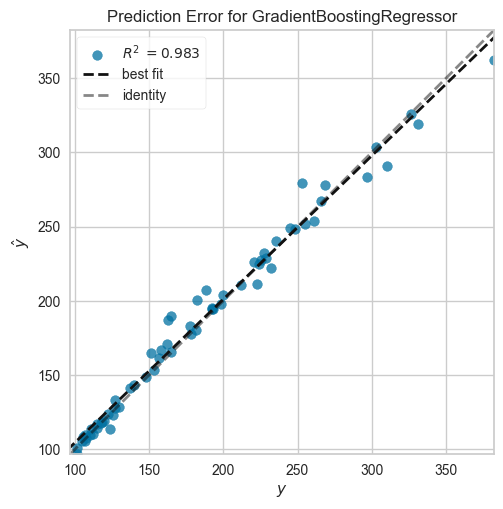

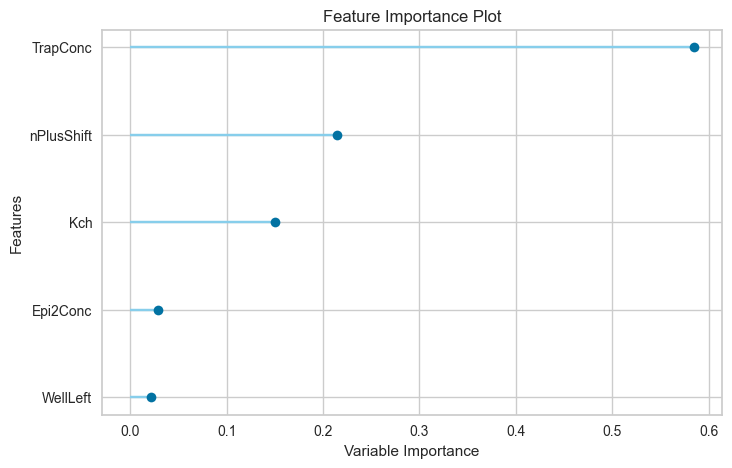

Model Successfully Saved
Target feature: IdSC800V_max


,Description,Value
0,Session id,12233
1,Target,IdSC800V_max
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.9112,50.2749,6.7071,0.9749,0.0350,0.0266,0.0060
lar,Least Angle Regression,5.9600,62.3889,7.7184,0.9659,0.0456,0.0344,0.0030
et,Extra Trees Regressor,6.5169,112.9270,9.8131,0.9437,0.0540,0.0371,0.0180
rf,Random Forest Regressor,9.0918,145.2884,11.3962,0.9247,0.0622,0.0516,0.0200
dt,Decision Tree Regressor,9.4476,181.6323,12.6699,0.9079,0.0692,0.0525,0.0030
lightgbm,Light Gradient Boosting Machine,11.3516,273.5053,14.6666,0.8634,0.0820,0.0667,0.0280
ada,AdaBoost Regressor,16.1271,391.1677,19.2698,0.8034,0.1039,0.0915,0.0080
knn,K Neighbors Regressor,27.1339,1003.8294,31.4596,0.4749,0.1692,0.1517,0.0050
ridge,Ridge Regression,27.2703,1051.9235,32.0890,0.4740,0.1715,0.1507,0.0030
en,Elastic Net,30.1403,1297.6336,35.5934,0.3584,0.1912,0.1671,0.0030


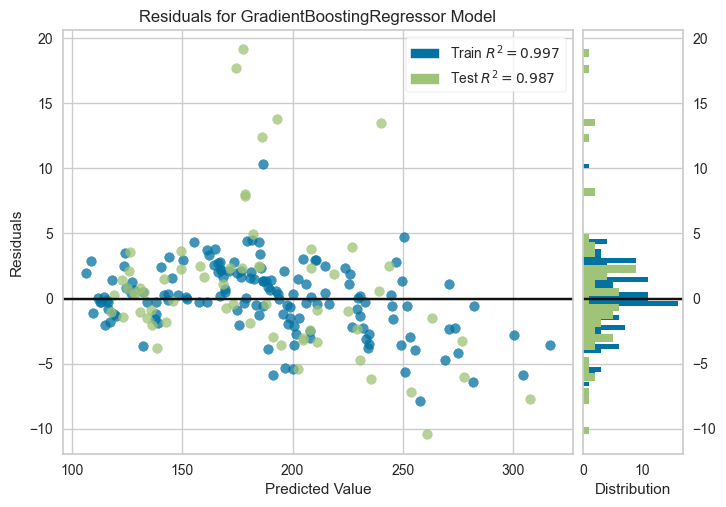

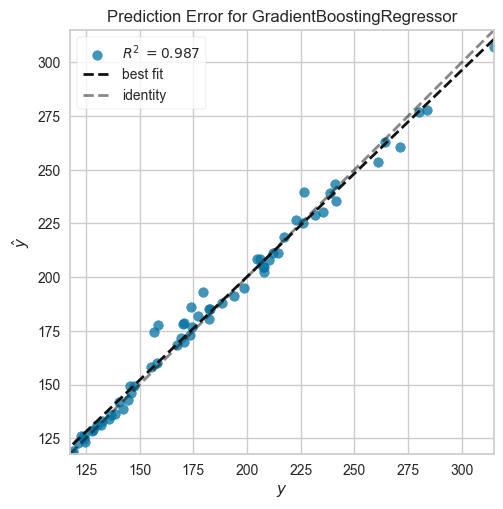

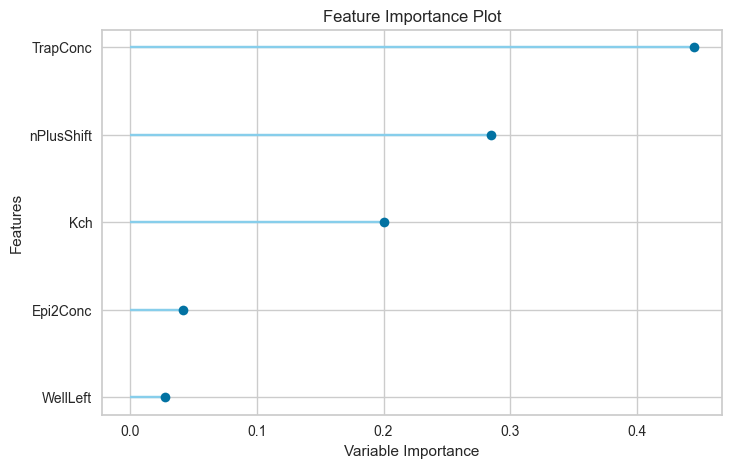

Model Successfully Saved
Target feature: SCWT800V_us


,Description,Value
0,Session id,12233
1,Target,SCWT800V_us
2,Target type,Regression
3,Original data shape,"(212, 6)"
4,Transformed data shape,"(212, 6)"
5,Transformed train set shape,"(148, 6)"
6,Transformed test set shape,"(64, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1858,0.0759,0.2516,0.9459,0.0342,0.0300,0.0070
lar,Least Angle Regression,0.2457,0.1346,0.3475,0.8982,0.0483,0.0398,0.0030
rf,Random Forest Regressor,0.3360,0.2077,0.4344,0.8494,0.0590,0.0537,0.0230
et,Extra Trees Regressor,0.2893,0.2374,0.4366,0.8224,0.0590,0.0450,0.0170
dt,Decision Tree Regressor,0.3900,0.2865,0.5085,0.7880,0.0701,0.0630,0.0030
ada,AdaBoost Regressor,0.4693,0.3149,0.5523,0.7765,0.0797,0.0802,0.0080
lightgbm,Light Gradient Boosting Machine,0.4309,0.4492,0.5992,0.6737,0.0808,0.0667,0.0360
ridge,Ridge Regression,0.9040,1.1176,1.0528,0.1901,0.1495,0.1549,0.0030
knn,K Neighbors Regressor,0.8939,1.0967,1.0422,0.1893,0.1469,0.1498,0.0050
llar,Lasso Least Angle Regression,0.9907,1.3758,1.1682,0.0022,0.1661,0.1710,0.0030


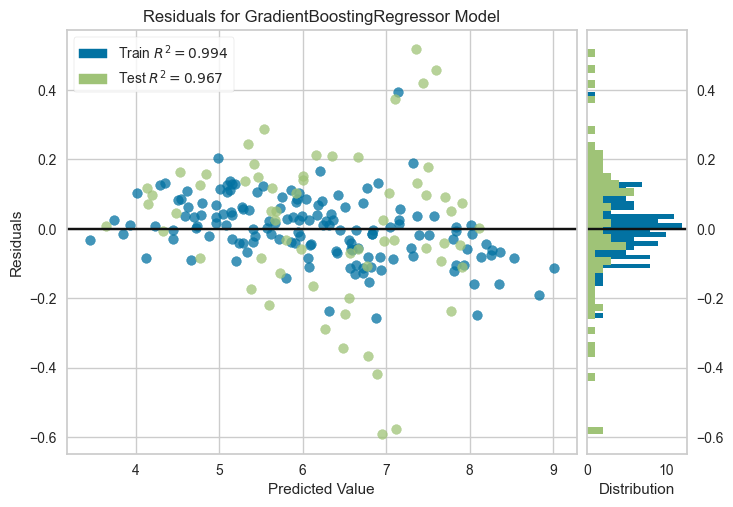

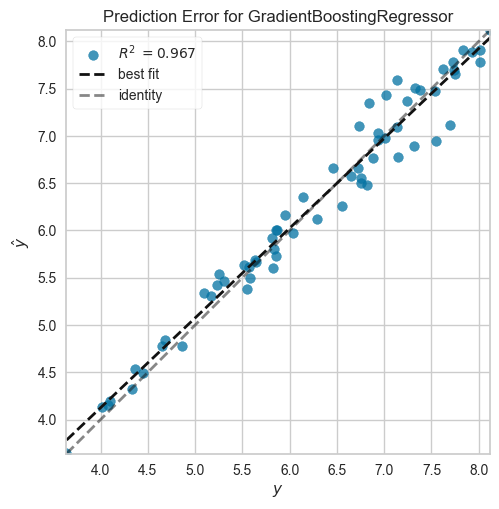

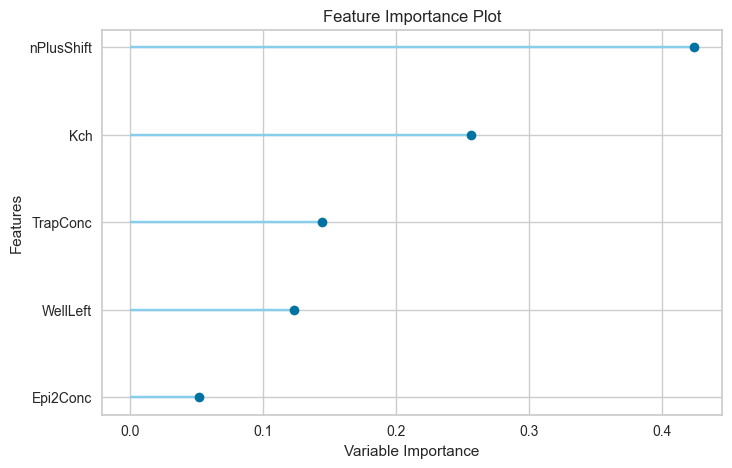

Model Successfully Saved


In [16]:
for target in output:
    print(f"Target feature: {target}")
    cols = [e for e in params]
    cols.append(target)
    data = df[cols]
    s = setup(data, target=target, session_id = 12233)
    best = compare_models()
    plot_model(best, plot = 'residuals')
    plot_model(best, plot = 'error')
    plot_model(best, plot = 'feature')
    save_model(best, f'models/{target}', model_only=True)

In [19]:
gm = load_model('models/gm') #make sure the folder models exist otherwise this will fail

Transformation Pipeline and Model Successfully Loaded


In [22]:
gm.predict([[200000000000, 1e+16, 3.35, 0.35, 1.1]])

array([0.25076896])